# Sister Cities for City Diplomacy

According to Sister Cities International, the program was introduced at a White House conference by President Eisenhower in 1956. The idea was for “individual sister cities, counties, and states across the United States” to link up with the citizens of other countries in an effort to bring about “citizen diplomacy.” Recognizing the damage done to diplomacy during World War II, Eisenhower established the program as a civilian vehicle for repairing and promoting international relations

## Why Sister Cities?

To promote cultural and commercial ties, such as
* International trade,
* Foreign investment,
* Tourism
* And workforce talent

Wikipedia is a rich data source. With Python we can actually copy over tables from Wikipedia and integrate them into our web-GIS workflows. 

## Copy Wikipedia Table into Python with Pandas

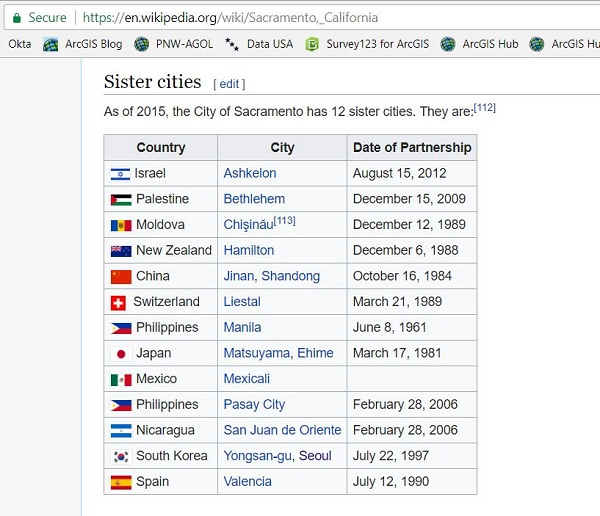

In [1]:
from IPython.display import Image

Image(r'images/wiki_table.jpg')

In [2]:
# We can copy tables from wikipedia into pandas, and push that table to ArcGIS Online
import pandas as pd 

#The sister cities table is the 12th table in the Wikipedia page for Sacramento (so we index it with 11)
sister_cities = pd.read_html("https://en.wikipedia.org/wiki/Sacramento,_California")[11]
sister_cities.columns = sister_cities.iloc[0]
sister_cities = sister_cities.reindex(sister_cities.index.drop(0))

sister_cities

,Country,City,Date of Partnership
1,Israel,Ashkelon,"August 15, 2012"
2,Palestine,Bethlehem,"December 15, 2009"
3,Moldova,Chişinău[113],"December 12, 1989"
4,New Zealand,Hamilton,"December 6, 1988"
5,China,"Jinan, Shandong","October 16, 1984"
6,Switzerland,Liestal,"March 21, 1989"
7,Philippines,Manila,"June 8, 1961"
8,Japan,"Matsuyama, Ehime","March 17, 1981"
9,Mexico,Mexicali,NaN
10,Philippines,Pasay City,"February 28, 2006"


In [3]:
#Remove special characters from Chisinau 
sister_cities.iloc[2,1] = "Chişinau"
sister_cities.head()

,Country,City,Date of Partnership
1,Israel,Ashkelon,"August 15, 2012"
2,Palestine,Bethlehem,"December 15, 2009"
3,Moldova,Chişinau,"December 12, 1989"
4,New Zealand,Hamilton,"December 6, 1988"
5,China,"Jinan, Shandong","October 16, 1984"


## Add Sister Cities Table to ArcGIS Online with the Python API

In [4]:
from arcgis.gis import GIS
from getpass import getpass

gis = GIS("https://arcgis.com", "astrong_pnw", getpass())
print(gis)

········
GIS @ https://arcgis.com


In [5]:
#https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html?highlight=import_data#arcgis.gis.ContentManager.import_data
fc = gis.content.import_data(sister_cities, {"CountryCode":"Country", "City": "City"})
fc

<FeatureCollection>

In [7]:
import json 
from arcgis.features import FeatureLayerCollection

#add item
item_properties  = {
    "title": "Sister Cities",
    "tags" : "sister cities, sacramento",
    "description": "Sister cities of Sacramento",
    "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"
}

sister_cities_fl = gis.content.add(item_properties)

#publish item
publishParameters={"name":"Sister_Cities_FLC_2"}

sister_cities_flc = sister_cities_fl.publish(publishParameters)
sister_cities_flc

<Item title:"Sister Cities" type:Feature Layer Collection owner:astrong_pnw>

## Run Connect Origins to Destinations Anaysis with Python API

<Item title:"Sacrameto" type:Feature Layer Collection owner:astrong_pnw>
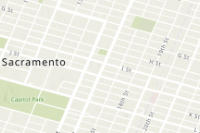

In [8]:
# First, let me grab my Sacramento (origin) dataset 
sacramento = gis.content.get('6333d6c6784c428a92f6e95f92170da4')
sacramento

In [9]:
#helpful guide: https://developers.arcgis.com/python/guide/using-network-analysis-tools/
#https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.use_proximity.html?highlight=use_proximity
import arcgis.features.use_proximity as use_proximity

#define arguments
origins_layer = sacramento
destination_layer = sister_cities_flc
measurement_type = "StraightLine"
output_name = "SC_Network"

#run connect origin to destinations analysis with api 
connect_analysis = use_proximity.connect_origins_to_destinations(origins_layer, destination_layer, measurement_type, output_name=output_name)
connect_analysis

<Item title:"SC_Network" type:Feature Layer Collection owner:astrong_pnw>

## Mapping Sacramento's Sister Cities

<Item title:"Sacramento Sister Cities Visualization" type:Web Map owner:astrong_pnw>
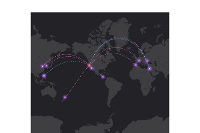

In [19]:
# map of sac-sister city (use Arcade to symbolize by date relationship was established)
agol_map = gis.content.search(query="title:Sacramento Sister Cities Visualization")
agol_map[0]